In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset_after_preprocessing.csv')

### Kategorisasi Kolom Lead_Time

In [3]:
# Melihat interval nilai pada kolom lead_time
df['lead_time'].describe()

count    119386.000000
mean        104.014801
std         106.863286
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [5]:
# Mengkategorisasikan kolom lead_time
lead_times = df['lead_time'].values

bins = [0, 90, 180, 270, 360, 450, 540, float('inf')]
labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21']

lead_time_cat = pd.cut(lead_times, bins=bins, labels=labels, right=False)

df['lead_time_in_month'] = pd.Categorical(lead_time_cat, categories=labels, ordered=True)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,lead_time_in_month
0,Resort Hotel,0,342,2017,September,27,1,0,0,Breakfast,...,No Deposit,Unknown,0,Personal,0.0,0,0,Check-Out,2.0,10-12
1,Resort Hotel,0,737,2017,September,27,1,0,0,Breakfast,...,No Deposit,Unknown,0,Personal,0.0,0,0,Check-Out,2.0,19-21
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,...,No Deposit,Unknown,0,Personal,75.0,0,0,Check-Out,1.0,1-3
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,...,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0,1-3
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,1-3


In [6]:
# Membuat tabel agregat
lead_time_impact = pd.pivot_table(df,
                                  index=['hotel', 'lead_time_in_month'],
                                  values=['total_guests', 'is_canceled'],
                                  aggfunc={'total_guests' : 'sum',
                                           'is_canceled' : 'sum'}
                                  ).reset_index()
lead_time_impact.rename(columns={'total_bookings' : 'total_guests'}, inplace=True)

# Membuat kolom total bookings
lead_time_impact['total_bookings'] = lead_time_impact['is_canceled'] + lead_time_impact['total_guests']

# Membuat kolom rasio cancel booking berdasarkan lead time
lead_time_impact['cancellation_rates'] = round(lead_time_impact['is_canceled'] / lead_time_impact['total_bookings'] * 100, 1)
lead_time_impact['cancellation_rates'].fillna(value=0, inplace=True)
lead_time_impact

,hotel,lead_time_in_month,is_canceled,total_guests,total_bookings,cancellation_rates
0,City Hotel,1-3,13439,84034.0,97473.0,13.8
1,City Hotel,4-6,8715,36455.0,45170.0,19.3
2,City Hotel,7-9,4350,16768.0,21118.0,20.6
3,City Hotel,10-12,4499,11724.0,16223.0,27.7
4,City Hotel,13-15,1303,3547.0,4850.0,26.9
5,City Hotel,16-18,511,1405.0,1916.0,26.7
6,City Hotel,19-21,281,536.0,817.0,34.4
7,Resort Hotel,1-3,4804,46561.0,51365.0,9.4
8,Resort Hotel,4-6,3074,17579.0,20653.0,14.9
9,Resort Hotel,7-9,2158,10702.0,12860.0,16.8


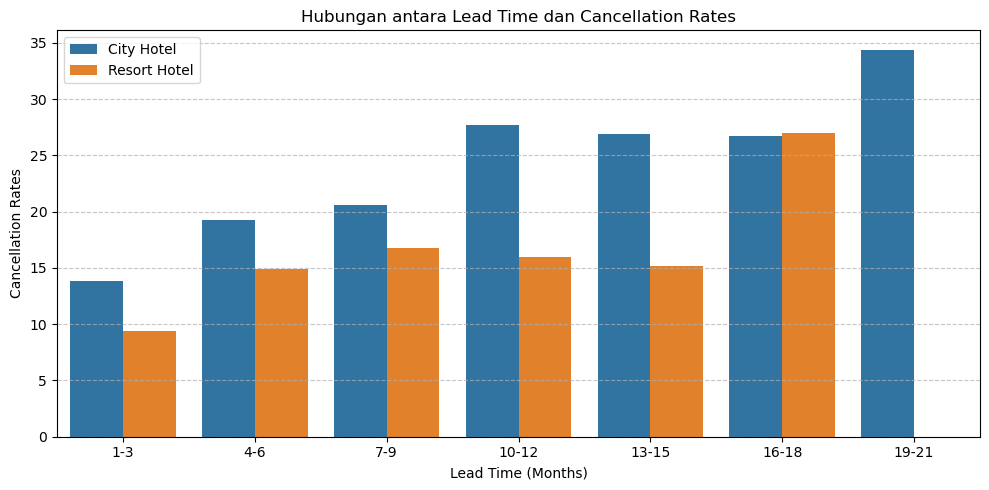

In [8]:
plt.figure(figsize=(10,5))

sns.barplot(data=lead_time_impact, x='lead_time_in_month', y='cancellation_rates', hue='hotel')

plt.title('Hubungan antara Lead Time dan Cancellation Rates')
plt.xlabel('Lead Time (Months)')
plt.ylabel('Cancellation Rates')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari grafik di atas dapat dilihat bahwa *Cancellation Rates* kedua jenis hotel mengalami tren yang cenderung meningkat seiring meningkatnya *Lead Time*. 
Artinya semakin lama jarak waktu pemesanan, semakin tinggi pula tingkat pembatalan pesanan yang mungkin terjadi. 

Walau Resort Hotel memiliki *Cancellation Rates* 0%, total booking yang terjadi pada jarak waktu pemesanan ini hanya sebanyak 50 booking sehingga diasumsikan nilai ini belum bisa dikatakan valid.